<center>
    <h1>
        <b>
        Film Genre Classification Based on Posters Using Artificial Neural Network
        <b>
    </h1>
    <h2>
        Pollux M. Rey
    </h2>
</center>

<h4>
    <b>
    Introduction
    </b>
</h4>
<p>
    A picture tells many stories. A film poster is used to attract people to watch a film. It must be able to give them a hint of what its plot could be. Although there are non-traditional ones, posters from a certain film genre have visual attributes that differs them from the other. <br> <br>
    According to James Verdesoto, a film poster expert, that in terms of color schemes, a comedy film gravitates towards using a white background, while monochrome and darker colors are often associated with action and sci-fi films <a href="https://www.youtube.com/watch?v=BEbW2fXSShc">[1]</a>. The color scheme of a poster is determined from the emotions the film wants to convey, which why a person could identify one's genre from it at a glance. <br> <br>
    On the other hand, there has been a rapid growth of using machine learning in different fields in recent years. The reason is that machine learning can detect subtle patterns in data that humans may not recognize at fast speed. <br> <br>
    The objective of the project is to investigate how an Artificial Neural Network (ANN), which is a machine learning algorithm, can identify the genres of films using their posters only, and, how accurate it is. <br> <br>
    The project, if considered successful, it can be used to recommend new films to audiences of a specific genre, and thus, saving them from wasting resources such as time and money.
</p>

<h4>
    <b>
    Methodology
    </b>
</h4>
<p>
    Figure 1 shows the flowchart of how the neural network was investigated as a poster-based film genre classifier. It started off with finding and preparing the right data set for the problem. Then, it was splitted into two subsets and one of them was an input to the machine learning algorithm. The output of the algorithm was a model, which was later used to the produce predictions for the other set. Lastly, the model will be evaluated based on its accuracy, precision, and such. A detailed description of each process will be shown in the succeeding sections of the project.
</p>
<br>
<div>
    <center>
        <img src="https://drive.google.com/uc?id=1dW71MJEUgUKomIDn2dDVgrDLLofU8dOP" width="150"/>
        <p>
        <b>Figure 1.</b> Flowchart of the investigation process
        </p>
    </center>
</div>

<h4>
  <b>
  Data and Analysis
  </b>
</h4>
<h5>
  <i>
  Data Collection
  </i>
</h5>
<p>
    The dataset used for the project is <a href="https://www.kaggle.com/raman77768/movie-classifier">[2]</a>. It contains 7,867 JPG files of film posters, but only 7,233 of them has a unique entry in the CSV file. <br> <br>
    Table 1 shows the first five rows in <i>train.csv</i>. Each record in the table contains the image file name and the list of genres of a film. This list has at most three genres, and, a value of 1 is assigned to the respected columns of these genres and a value of 0, to the other columns.
</p>

In [4]:
posters.head(5)

Id                                Genre  Action  Adventure  \
0  tt0086425                  ['Comedy', 'Drama']       0          0   
1  tt0085549        ['Drama', 'Romance', 'Music']       0          0   
2  tt0086465                           ['Comedy']       0          0   
3  tt0086567               ['Sci-Fi', 'Thriller']       0          0   
4  tt0086034  ['Action', 'Adventure', 'Thriller']       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  ...  N/A  News  \
0          0          0       1      0            0      1  ...    0     0   
1          0          0       0      0            0      1  ...    0     0   
2          0          0       1      0            0      0  ...    0     0   
3          0          0       0      0            0      0  ...    0     0   
4          0          0       0      0            0      0  ...    0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        0       0      0      0         0    0        0  
1           0        1       0      0      0         0    0        0  
2           0        0       0      0      0         0    0        0  
3           0        0       1      0      0         1    0        0  
4           0        0       0      0      0         1    0        0  

[5 rows x 27 columns]

<p>
    <b>Table 1.</b> First five records in <i>train.csv</i>
</p>
<p>
    Meanwhile, Figure 2 shows the corresponding film posters assigned to Table 1. There is no uniform dimension for all images, which would be applied later, for consistency reasons.
</p>

Photo  1
Height:  444
Width:   300


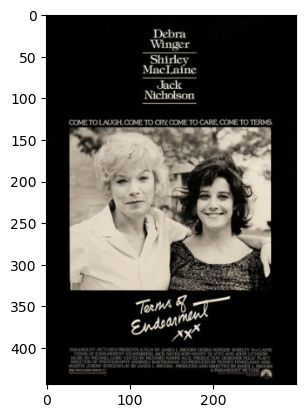

Photo  2
Height:  444
Width:   300


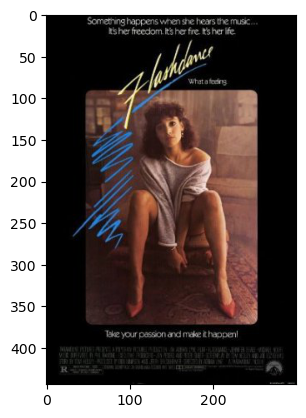

Photo  3
Height:  432
Width:   300


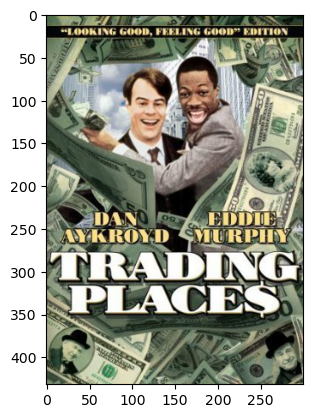

Photo  4
Height:  450
Width:   300


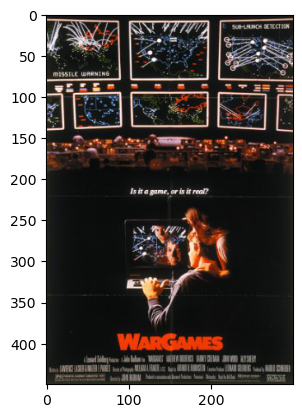

Photo  5
Height:  450
Width:   300


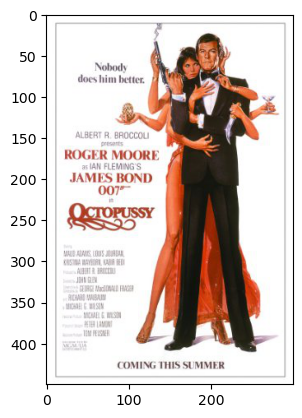

In [122]:
for i, item in enumerate(list(posters['Id'].head(5))):
    img = image.load_img('dataset/Images/' + item + '.jpg')
    img = image.img_to_array(img)
    img = img/255
    
    print("Photo ", i+1)
    print("Height: ", img.shape[0])
    print("Width:  ", img.shape[1])
    
    plt.imshow(img)
    plt.show()

<p>
    <b>Figure 2.</b> Images of the first five films in the CSV file
</p>
<p>
    Figure 3 shows that the film genres considered and the number of posters assigned to each. It can be observed that there are 24 "film genres", including 'N/A' and merging 'Music' and 'Musical'. <i>Drama</i> and <i>comedy</i> are the two most common genres and followed by <i>romance</i>, by a large margin, while the rarest in the dataset are <i>reality-TV</i> films.
</p>

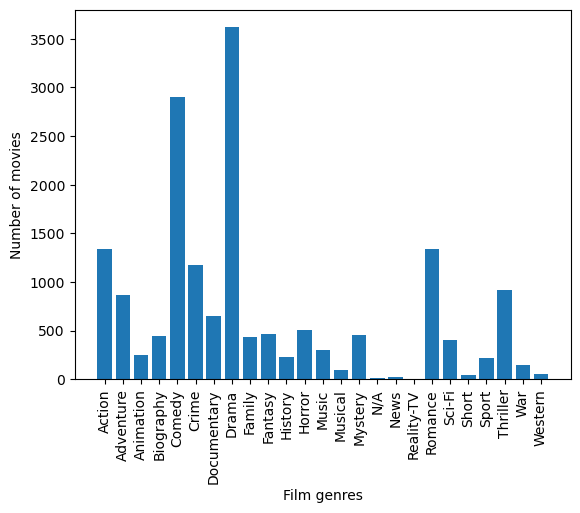

In [6]:
x_bar_values = list(posters.columns[2:])
y_bar_values = posters[posters.columns[2:]].sum(axis=0)

plt.bar(x_bar_values, y_bar_values)
plt.plot()

plt.xlabel("Film genres")
plt.ylabel("Number of movie posters")
plt.xticks(rotation='vertical')
plt.show()

<p>
    <b>Figure 3.</b> Bar chart of the distribution of the number of movie posters per film genre
</p>
<h5>
    <i>
    Data Preprocessing
    </i>
</h5>
<p>
    The data needs to be transformed for the machine learning algorithm to understand. <br> <br>
    A digital image is an array of pixels and the value of each pixel depends on how intense a color is. For this project, each image was resized to 256 pixels wide and 256 pixels tall. Then, it was represented as an RGB matrix, which is a three 256 x 256 matrices that show how intense the red, blue, and green are in the pixels. Figure 4 shows the outputs of these processes using a photo from the dataset. Just to see what it looks like, the image was set to a smaller size. <br> <br>
    The pixels in an RGB image is considered as the independent variables, X, which are used as an input to train and test the model. Therefore, there are 256 * 256 * 3 = 196,608 independent variables or features considered.
</p>

Original image: 


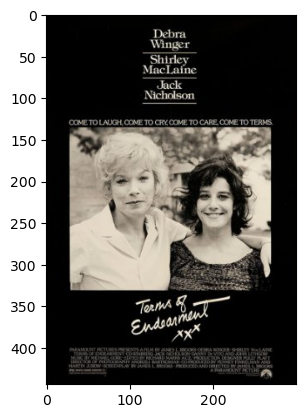

Resized image: 


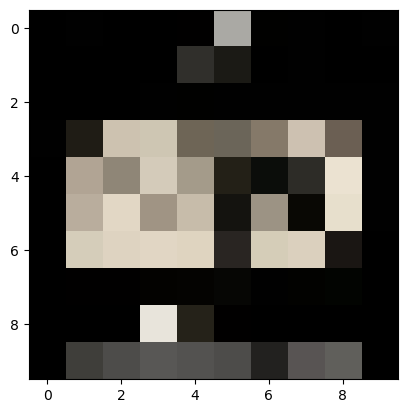

Red channel of the resized image:


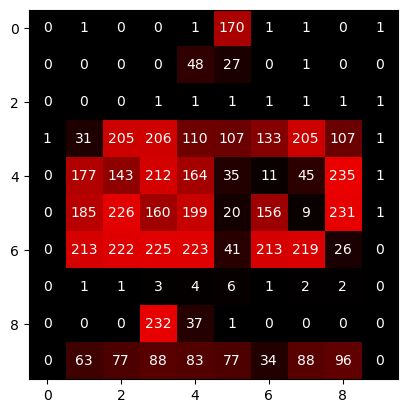

Green channel of the resized image:


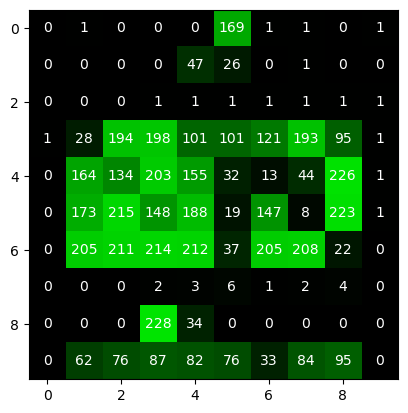

Blue channel of the resized image:


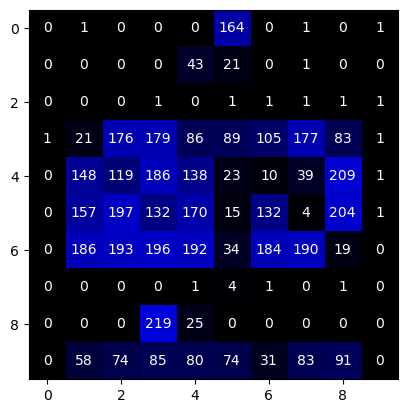

In [187]:
print("Original image: ")
img = image.load_img('dataset/Images/tt0086425.jpg')
plt.imshow(img)
plt.show()

print("Resized image: ")
img = image.load_img('dataset/Images/tt0086425.jpg', target_size=(10,10))
plt.imshow(img)
plt.show()

red_img = np.array(img.copy())
red_img[:,:,1] = red_img[:,:,2] = 0

green_img = np.array(img.copy())
green_img[:,:,0] = green_img[:,:,2] = 0

blue_img = np.array(img.copy())
blue_img[:,:,0] = blue_img[:,:,1] = 0

channels = ['Red', 'Green', 'Blue']
for index, item in enumerate([red_img, green_img, blue_img]):
    print(channels[index] + ' channel of the resized image:')
    plt.imshow(item)
    for (i, j), z in np.ndenumerate(item[:,:,index]):
        plt.text(j, i, z, ha="center", va="center", color="w")
    plt.show()

<p>
    <b>Figure 3.</b> Original image of the first film in <i>train.csv</i> and the resized image and its RGB image
</p>
<p>
    Since the goal of the project is to test whether neural networks can predict the genres of the film from its poster, the dependent variables, Y, should be the film genres itself, and these can be obtained from the DataFrame presented before. To make the DataFrame usable during the training and testing, the DataFrame should be cleaned first. <br> <br>
    To summarize, (1) there were duplicated rows dropped, (2) the columns 'Id' and 'Genre' were dropped, (3) the genre columns 'N/A', 'News', and 'Reality-TV' were dropped as they are not considered as film genres, and (4) the rows with no assigned genres were dropped. Now, the number of genres was  reduced to 22 and there are 7,221 rows in the DataFrame.<br> <br>
    Along with the set of RGB images, the DataFrame would also be used for model training and testing.
<h5>
    <i>
    Model training
    </i>
</h5>
<p>
    After extracting the features in the images and cleaning the DataFrame, the dataset was split into training and test sets. Two-thirds of the dataset went to the training part and the other to the testing part. The model that was used is <a href="https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html">[3]</a>, which was implemented to classify whether an image contains a dog or a cat. The model uses the <i>Keras</i> module, which is used to implement ANNs. <br> <br>
    It contains three sets of a convolution layer with a ReLU activation and a max-pooling layer, and ended up with 21 units with sigmoid activation. Also, it was trained with 10 epochs.
</p>
<h5>
    <i>
    Model testing and Evaluation
    </i>
</h5>
<p>
    The problem being dealt with is an example of multi-label classification. This classification task treats the class labels as non-mutually exclusive. To test how well the model is to the test set, some of the metrics given in <a href="https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics">[4]</a> were used. Table 2 shows the summary of these metrics. 
</p>
<br>
<img src="https://drive.google.com/uc?id=13q3Yn0n5azYQCV_QoDdEaDZsixdZV-2P" width="600"/>
<p>
    <b>Table 2.</b> Descriptions and equations of the metrics used in the multi-label classification
</p>
<br>
<p>
    Since there is no definite number of genres a film can have and the set of its possible values is {1, 2, 3}, the project considered five options for handling the predictions: (1) get (a) one, (b) two, and, (c) three genres with the highest probabilities, (2) get the first n<sub>i</sub> genres, based on the number of film genres in the actual output values, and (3) get the first n<sub>i</sub> genres, based on a randomizer. Table 3 shows the obtained values in each metric for the five options.
</p>
<br>
<img src="https://drive.google.com/uc?id=1B3AbpO6VAdnGDcr_Ov0wrsUnJ8Eyfdj1" width="600"/>
<p>
    <b>Table 3.</b> Obtained exact match ratio, Hamming loss, accuracy, and precision scores for each label selection method
</p>
<p>
   It can be observed that selecting the predicted genre with the highest probability gives the highest exact matching ratio (EMR). However, EMR is a harsh metric as it considers the correctness of every label in a sample. In this metric, the prediction is already incorrect even if there is just one genre mislabelled. This is where Hamming loss comes in handy, in which partially correct prediction have a weight to the measurement. The lower Hamming loss, the better the model is. Again, the first method has the lowest Hamming loss among different methods. <br> <br>
    Although the first method is the best in terms of EMR, Hamming loss and precision score, it fails to be the most accurate. This was taken by the second method, which is to select the two most probable genres.
<p>
<h4>
    Conclusion
</h4>
<p>
    The model exhibits an average EMR, Hamming loss, accuracy, and precision of <b>5.44%</b>, <b>12.42%</b>, <b>28.2%</b>, <b>44.96%</b>, respectively. An imbalanced dataset and a short training time may have contributed to the low accuracy and precision scores. Further improvement of the model or providing a better model, and data cleaning should be made to make it more usable.
</p>
<h4>
    References
</h4>
<p>
    Chollet, B. F. (2016, June 5). <i>Building powerful image classification models using very little data.</i> The Keras Blog. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html <br>
    Chu, W. T., & Guo, H. J. (2017). Movie Genre Classification based on Poster Images with Deep Neural Networks. Proceedings of the Workshop on Multimodal Understanding of Social, Affective and Subjective Attributes. Published. https://doi.org/10.1145/3132515.3132516 [Original source of the dataset] <br>
    Murat, M. (2020, January 25). <i>Metrics for multilabel classification.</i> Mustafa Murat Arat. https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics <br>
    Vanity Fair. (2019, March 11). <i>Movie poster expert explains color schemes</i> [Video]. YouTube. https://www.youtube.com/watch?v=BEbW2fXSShc
</p>

<h4>
    Appendix
</h4>
<h5>
    <i>
    Whole source code of the experiment
    </i>
</h5>

In [183]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

In [33]:
posters = pd.read_csv('dataset/train.csv')

In [34]:
posters.shape

(7254, 27)

In [36]:
pd.set_option('display.max_columns', None)
posters.head(5)

Id                                Genre  Action  Adventure  \
0  tt0086425                  ['Comedy', 'Drama']       0          0   
1  tt0085549        ['Drama', 'Romance', 'Music']       0          0   
2  tt0086465                           ['Comedy']       0          0   
3  tt0086567               ['Sci-Fi', 'Thriller']       0          0   
4  tt0086034  ['Action', 'Adventure', 'Thriller']       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  \
0          0          0       1      0            0      1       0        0   
1          0          0       0      0            0      1       0        0   
2          0          0       1      0            0      0       0        0   
3          0          0       0      0            0      0       0        0   
4          0          0       0      0            0      0       0        0   

   History  Horror  Music  Musical  Mystery  N/A  News  Reality-TV  Romance  \
0        0       0      0        0        0    0     0           0        0   
1        0       0      1        0        0    0     0           0        1   
2        0       0      0        0        0    0     0           0        0   
3        0       0      0        0        0    0     0           0        0   
4        0       0      0        0        0    0     0           0        0   

   Sci-Fi  Short  Sport  Thriller  War  Western  
0       0      0      0         0    0        0  
1       0      0      0         0    0        0  
2       0      0      0         0    0        0  
3       1      0      0         1    0        0  
4       0      0      0         1    0        0

Photo  1
Height:  444
Width:   300


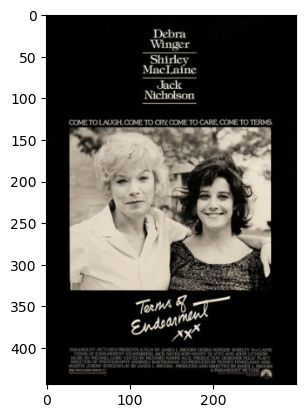

Photo  2
Height:  444
Width:   300


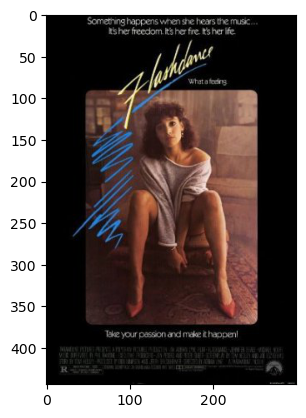

Photo  3
Height:  432
Width:   300


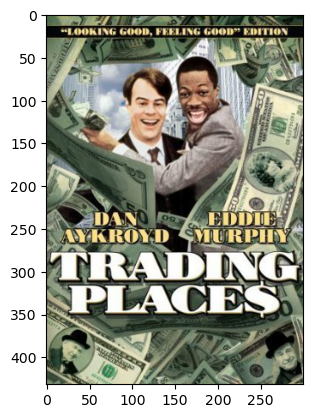

Photo  4
Height:  450
Width:   300


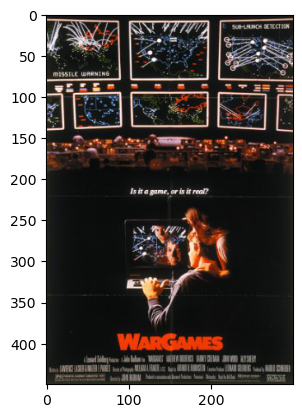

Photo  5
Height:  450
Width:   300


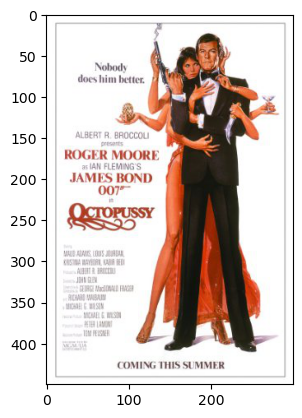

In [5]:
for i, item in enumerate(list(posters['Id'].head(5))):
    img = image.load_img('dataset/Images/' + item + '.jpg')
    img = image.img_to_array(img)
    img = img/255
    
    print("Photo ", i+1)
    print("Height: ", img.shape[0])
    print("Width:  ", img.shape[1])
    
    plt.imshow(img)
    plt.show()

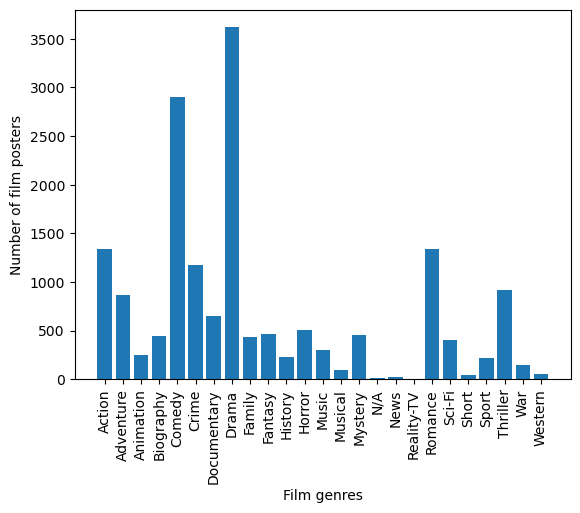

In [6]:
x_bar_values = list(posters.columns[2:])
y_bar_values = posters[posters.columns[2:]].sum(axis=0)

plt.bar(x_bar_values, y_bar_values)
plt.plot()

plt.xlabel("Film genres")
plt.ylabel("Number of film posters")
plt.xticks(rotation='vertical')
plt.show()

In [37]:
# Preprocessing

# Drop rows which has no corresponding image
for i in list(posters['Id']):
  if not os.path.exists('dataset/Images/' + i + '.jpg'):
    posters.drop(posters[posters['Id'] != 0].index, inplace=True)
# Drop rows which contain missing values
posters.dropna()
# Drop rows with duplicate ID and keep the first one
posters.drop_duplicates(subset='Id', keep = False, inplace = True)
# Delete the 'N/A', 'News', and 'Reality-TV' columna
posters.drop('N/A', axis=1, inplace=True)
posters.drop('News', axis=1, inplace=True)
posters.drop('Reality-TV', axis=1, inplace=True)
# Delete the 'Genre' column since genres are already represented in columns
posters.drop('Genre', axis=1, inplace=True)
# Drop rows with empty genres
posters.drop(posters[posters.sum(axis=1) == 0].index, inplace=True)
# Merge 'Music' with 'Musical'
posters.loc[posters['Music'] == 1, 'Musical'] = 1 
posters.drop('Music', axis=1, inplace=True)
# Reset index
posters.reset_index(drop=True, inplace=True)

In [38]:
print(posters.sum(axis=1).min())
print(posters.sum(axis=1).max())

1
3


In [39]:
posters.shape

(7221, 22)

In [40]:
posters.head(5)

Id  Action  Adventure  Animation  Biography  Comedy  Crime  \
0  tt0086425       0          0          0          0       1      0   
1  tt0085549       0          0          0          0       0      0   
2  tt0086465       0          0          0          0       1      0   
3  tt0086567       0          0          0          0       0      0   
4  tt0086034       1          1          0          0       0      0   

   Documentary  Drama  Family  Fantasy  History  Horror  Musical  Mystery  \
0            0      1       0        0        0       0        0        0   
1            0      1       0        0        0       0        1        0   
2            0      0       0        0        0       0        0        0   
3            0      0       0        0        0       0        0        0   
4            0      0       0        0        0       0        0        0   

   Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0        0       0      0      0         0    0        0  
1        1       0      0      0         0    0        0  
2        0       0      0      0         0    0        0  
3        0       1      0      0         1    0        0  
4        0       0      0      0         1    0        0

In [ ]:
train_image = []
# count = 0

for i in list(posters['Id']):
    img = image.load_img('dataset/Images/' + i + '.jpg', target_size=(256, 256))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
#     print(count)
#     count = count + 1
    
X = np.array(train_image)

In [42]:
# Drop 'Id' column after images were processed
posters.drop('Id', axis=1, inplace=True)

In [54]:
# Store array for later use
# np.save('posters.npy', X)

# Load stored array
# X = np.load('posters.npy')

In [46]:
Y = posters.to_numpy()

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [52]:
# Source of the model: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(21))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Train on 4838 samples
Epoch 1/10
4838/4838 [==============================] - 256s 53ms/sample - loss: 0.3723 - accuracy: 0.8588
Epoch 2/10
4838/4838 [==============================] - 239s 49ms/sample - loss: 0.3051 - accuracy: 0.8897
Epoch 3/10
4838/4838 [==============================] - 247s 51ms/sample - loss: 0.2939 - accuracy: 0.8932
Epoch 4/10
4838/4838 [==============================] - 283s 58ms/sample - loss: 0.2835 - accuracy: 0.8971
Epoch 5/10
4838/4838 [==============================] - 257s 53ms/sample - loss: 0.2744 - accuracy: 0.8990
Epoch 6/10
4838/4838 [==============================] - 251s 52ms/sample - loss: 0.2619 - accuracy: 0.9017
Epoch 7/10
4838/4838 [==============================] - 241s 50ms/sample - loss: 0.2492 - accuracy: 0.9052
Epoch 8/10
4838/4838 [==============================] - 243s 50ms/sample - loss: 0.2360 - accuracy: 0.9089
Epoch 9/10
4838/4838 [==============================] - 242s 50ms/sample - loss: 0.2191 - accuracy: 0.9131
Epoch 10/10
483

In [53]:
# Save model for later use
model.save('film_classifier')

# Load model for later use
# from tensorflow.keras.models import load_model
# model = load_model('film_classifier')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: film_classifier/assets


In [61]:
# Y_pred = model.predict(X_test)

# Store array for later use
# np.save('Y_pred.npy', Y_pred)

# Load stored array
# Y_pred = np.load('Y_pred.npy')

In [62]:
Y_pred[0]

array([0.3352137 , 0.32126147, 0.17875248, 0.16823515, 0.4311034 ,
       0.28117752, 0.20912072, 0.38186187, 0.20913658, 0.16418466,
       0.06918007, 0.10112676, 0.11140931, 0.08575937, 0.22643209,
       0.13905826, 0.02596894, 0.13457802, 0.15902328, 0.0567095 ,
       0.02580082], dtype=float32)

In [58]:
Y_test[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
Y_pred_1_a = Y_pred.copy()

for i in range(len(Y_pred_1_a)):
    predicted_genres = np.argsort(Y_pred_1_a[i])[-1:]
    Y_pred_1_a[i][:] = 0
    Y_pred_1_a[i][predicted_genres] = 1
    
Y_pred_1_a = Y_pred_1_a.astype(int)
Y_pred_1_a[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
Y_pred_1_b = Y_pred.copy()

for i in range(len(Y_pred_1_b)):
    predicted_genres = np.argsort(Y_pred_1_b[i])[-2:]
    Y_pred_1_b[i][:] = 0
    Y_pred_1_b[i][predicted_genres] = 1
    
Y_pred_1_b = Y_pred_1_b.astype(int)
Y_pred_1_b[0]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
Y_pred_1_c = Y_pred.copy()

for i in range(len(Y_pred_1_c)):
    predicted_genres = np.argsort(Y_pred_1_c[i])[-3:]
    Y_pred_1_c[i][:] = 0
    Y_pred_1_c[i][predicted_genres] = 1
    
Y_pred_1_c = Y_pred_1_c.astype(int)
Y_pred_1_c[0]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
Y_pred_2 = Y_pred.copy()

number_of_genres = Y_test.sum(axis=1)
for i in range(len(Y_pred_2)):
    predicted_genres = np.argsort(Y_pred_2[i])[-number_of_genres[i]:]
    Y_pred_2[i][:] = 0
    Y_pred_2[i][predicted_genres] = 1

Y_pred_2 = Y_pred_2.astype(int)
Y_pred_2[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [105]:
Y_pred_3 = Y_pred.copy()

np.random.seed(1)

for i in range(len(Y_pred_3)):
    random_number = np.random.randint(1, 4)
    predicted_genres = np.argsort(Y_pred_3[i])[-(random_number):]
    Y_pred_3[i][:] = 0
    Y_pred_3[i][predicted_genres] = 1

Y_pred_3 = Y_pred_3.astype(int)
Y_pred_3[0]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
# Exact Match Ratio
print("Exact Match Ratio")
print("Option 1A: ", accuracy_score(Y_test, Y_pred_1_a))
print("Option 1B: ", accuracy_score(Y_test, Y_pred_1_b))
print("Option 1C: ", accuracy_score(Y_test, Y_pred_1_c))
print("Option 2:  ", accuracy_score(Y_test, Y_pred_2))
print("Option 3:  ", accuracy_score(Y_test, Y_pred_3))

Exact Match Ratio
Option 1A:  0.07679395719681074
Option 1B:  0.03986571548468317
Option 1C:  0.03860679815358791
Option 2:   0.06420478388585817
Option 3:   0.05245488879563575


In [126]:
# Hamming Loss
print("Hamming Loss")
print("Option 1A: ", hamming_loss(Y_test, Y_pred_1_a))
print("Option 1B: ", hamming_loss(Y_test, Y_pred_1_b))
print("Option 1C: ", hamming_loss(Y_test, Y_pred_1_c))
print("Option 2:  ", hamming_loss(Y_test, Y_pred_2))
print("Option 3:  ", hamming_loss(Y_test, Y_pred_3))

Hamming Loss
Option 1A:  0.10612872929280819
Option 1B:  0.11965709489838738
Option 1C:  0.14485542433507184
Option 2:   0.12593169873908439
Option 3:   0.1237735547429211


In [181]:
# Accuracy

def accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

print("Accuracy")
print("Option 1A: ", accuracy(Y_test, Y_pred_1_a))
print("Option 1B: ", accuracy(Y_test, Y_pred_1_b))
print("Option 1C: ", accuracy(Y_test, Y_pred_1_c))
print("Option 2:  ", accuracy(Y_test, Y_pred_2))
print("Option 3:  ", accuracy(Y_test, Y_pred_3))

Accuracy
Option 1A:  0.26276402294027124
Option 1B:  0.30899426493215915
Option 1C:  0.3075115400755377
Option 2:   0.23580221009931404
Option 3:   0.2941740103510995


In [180]:
# Precision
print("Precision")
print("Option 1A: ", precision_score(y_true=Y_test, y_pred=Y_pred_1_a, average='samples'))
print("Option 1B: ", precision_score(y_true=Y_test, y_pred=Y_pred_1_b, average='samples'))
print("Option 1C: ", precision_score(y_true=Y_test, y_pred=Y_pred_1_c, average='samples'))
print("Option 2:  ", precision_score(y_true=Y_test, y_pred=Y_pred_2, average='samples'))
print("Option 3:  ", precision_score(y_true=Y_test, y_pred=Y_pred_3, average='samples'))

Precision
Option 1A:  0.5505665127989928
Option 1B:  0.4542593369702056
Option 1C:  0.38131207161840813
Option 2:   0.40159462861938733
Option 3:   0.4597845852566792


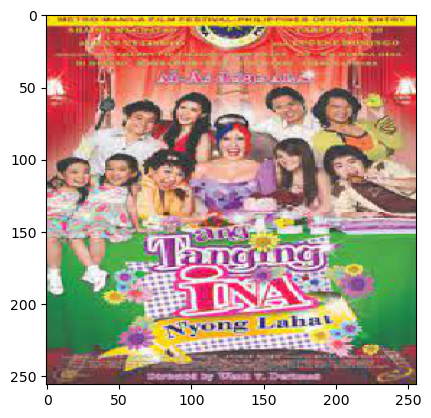

['Comedy', 'Drama', 'Romance']


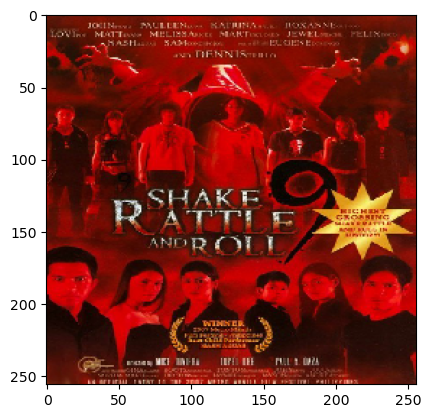

['Action', 'Crime', 'Drama']


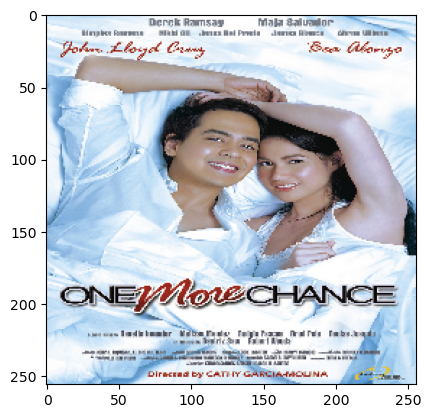

['Comedy', 'Drama', 'Romance']


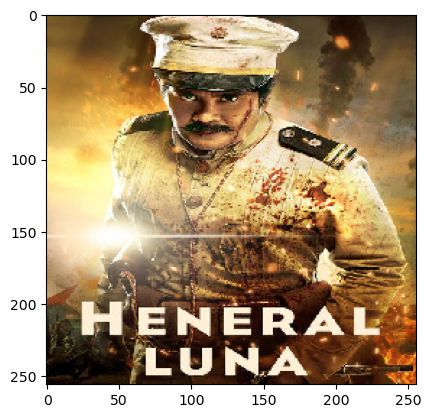

['Comedy', 'Drama', 'Romance']


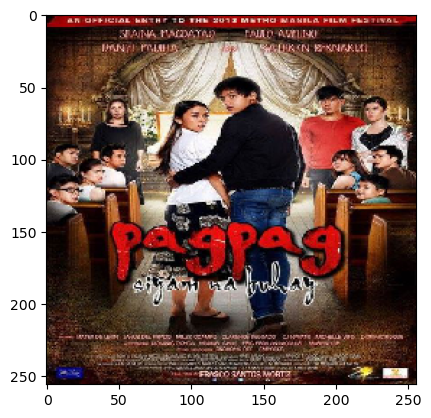

['Comedy', 'Drama', 'Romance']


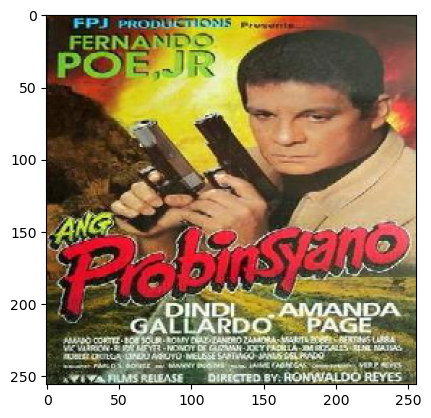

['Comedy', 'Drama', 'Romance']


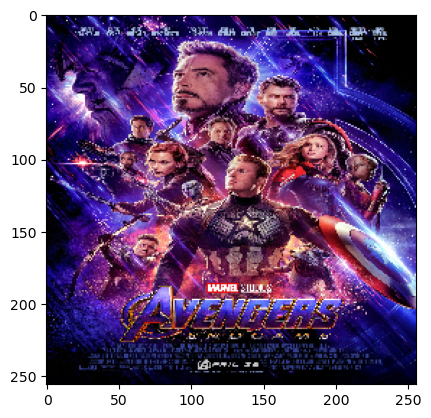

['Adventure', 'Comedy', 'Drama']


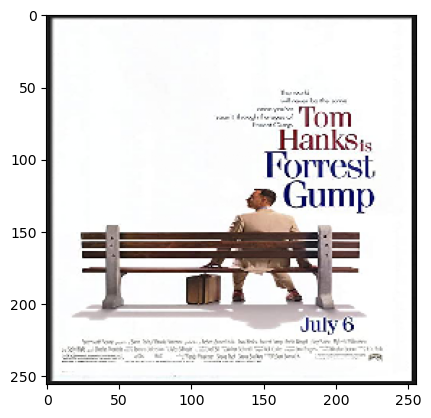

['Comedy', 'Drama', 'Romance']


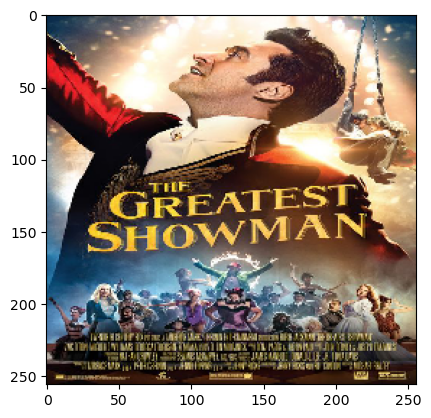

['Adventure', 'Comedy', 'Drama']


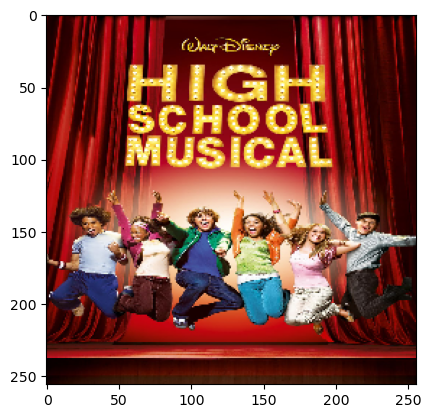

['Action', 'Comedy', 'Drama']


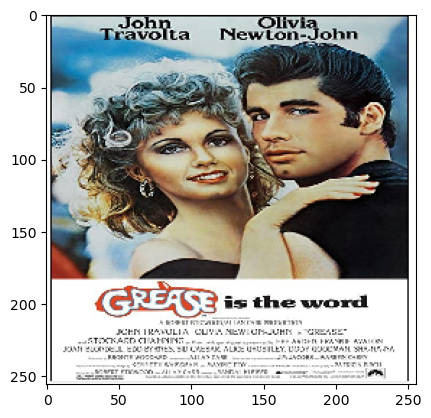

['Comedy', 'Drama', 'Romance']


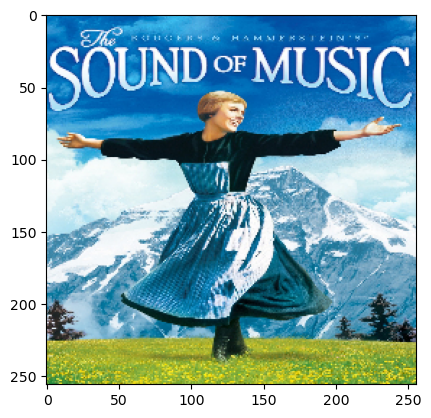

['Comedy', 'Drama', 'Romance']


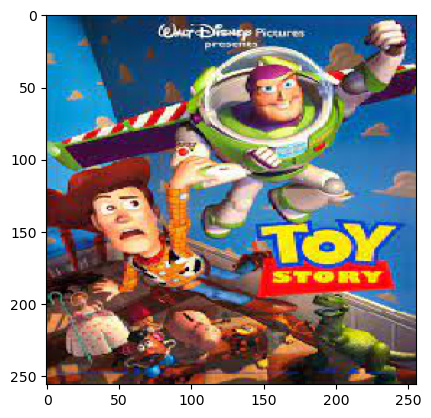

['Adventure', 'Comedy', 'Family']


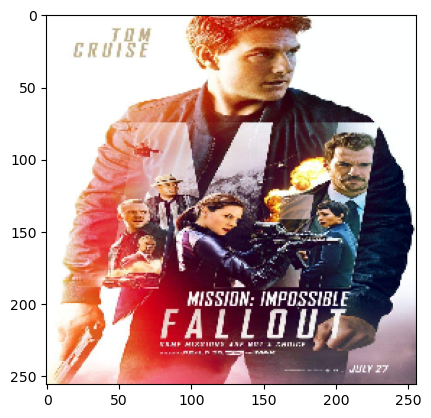

['Action', 'Crime', 'Drama']


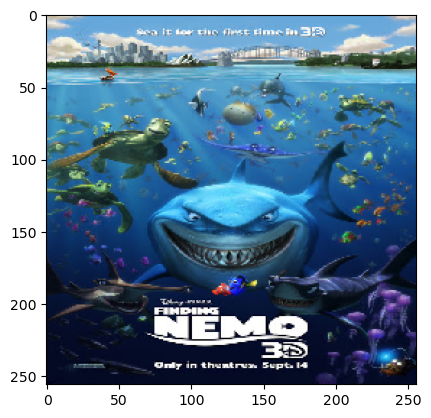

['Action', 'Crime', 'Drama']


In [188]:
# Try films made in the Philippines and popular Hollywood films

def get_predicted_genre(lst):
    film_genre_list = [col for col in posters.columns]
    for i, item in enumerate(lst):
        img = image.load_img('dataset/Images/new/' + item + '.jpg', target_size=(256, 256))
        img = image.img_to_array(img)
        img = img/255

        plt.imshow(img)
        plt.show()

        img = img.reshape(1,256,256,3)

        img_pred = model.predict(img)[0]

        predicted_genres_index = np.argsort(img_pred)[-3:]
        predicted_genres_index
        img_pred[:] = 0
        img_pred[predicted_genres_index] = 1

        img_pred = img_pred.astype(int)

        predicted_genres = [film_genre_list[index] for index, item in enumerate(img_pred) if item == 1]
        print(predicted_genres)
        
filipino_films = ['Ang_Tanging_Ina_Nyong_Lahat', 'Shake_Rattle_and_Roll_9', 
                  'One_More_Chance', 'Heneral_Luna', 'Pagpag', 'Ang_Probinsyano']
popular_films = ['Avengers_Endgame', 'Forrest_Gump', 'The_Greatest_Showman', 
                 'High_School_Musical', 'Grease', 'The_Sound_of_Music', 'Toy_Story',
                 'Mission_Impossible_Fallout']

get_predicted_genre(filipino_films)
get_predicted_genre(popular_films)